# Data analysis and modeling

This task involves analysing a dataset which is composed of 9 features ("name", "age", "lifestyle","zip code", "family status", "car", "sports", "earnings" and "Living) collected for a certain population. This data is modeled to predict a response of a population in question. The reaction of an individual is either "response" or "no response". 

This is a classic binary classification problem with labels having binary values; '1' or '0'.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas.util.testing as tm
import os
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import warnings

/Users/Srinath/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


### Fetching data

In [2]:
data = pd.read_csv('Recruiting_Task_InputData.csv')
data.head()

,name,age,lifestyle,zip code,family status,car,sports,earnings,label,Living area
0,VnSEFOuL,62.0,cozily,50168.0,married,practical,athletics,102526.0,no response,urban
1,8Tv0hcce,34.0,active,66479.0,married,expensive,soccer,33006.0,no response,urban
2,Zny9ysbk,69.0,healthy,16592.0,single,expensive,badminton,118760.0,response,urban
3,HV3xCamM,57.0,cozily,50068.0,married,practical,soccer,131429.0,response,urban
4,sflRsQ6v,66.0,cozily,35988.0,single,practical,badminton,96003.0,response,urban


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           10000 non-null  object 
 1   age            10000 non-null  float64
 2   lifestyle      10000 non-null  object 
 3   zip code       10000 non-null  float64
 4   family status  10000 non-null  object 
 5   car            10000 non-null  object 
 6   sports         8500 non-null   object 
 7   earnings       10000 non-null  float64
 8   label          10000 non-null  object 
 9   Living area    10000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 781.4+ KB


### Viewing data

Checking the categorical attributes and the number of individuals belonging to each category

In [4]:
data['name'].duplicated().any() # checking if we have records with same name

False

In [5]:
data["lifestyle"].value_counts()

active     3375
cozily     3346
healthy    3279
Name: lifestyle, dtype: int64

In [6]:
data["family status"].value_counts()

married    5032
single     4968
Name: family status, dtype: int64

In [7]:
data["car"].value_counts()

practical    5051
expensive    4949
Name: car, dtype: int64

In [8]:
data["sports"].value_counts()

athletics    2853
badminton    2828
soccer       2819
Name: sports, dtype: int64

In [9]:
data["Living area"].value_counts()

urban    6300
rural    3700
Name: Living area, dtype: int64

In [10]:
# Reaction/Label
data["label"].value_counts()

no response    6640
response       3360
Name: label, dtype: int64

In [11]:
data.describe() # checking the summary of numerical attributes for inconsitency

,age,zip code,earnings
count,10000.000000,10000.000000,10000.000000
mean,42.090700,55227.270600,85337.799600
std,15.874416,26139.756227,37554.523323
min,15.000000,10003.000000,20006.000000
25%,28.000000,32708.250000,53237.250000
50%,42.000000,55290.000000,85617.500000
75%,56.000000,77967.750000,118111.000000
max,69.000000,99982.000000,149975.000000


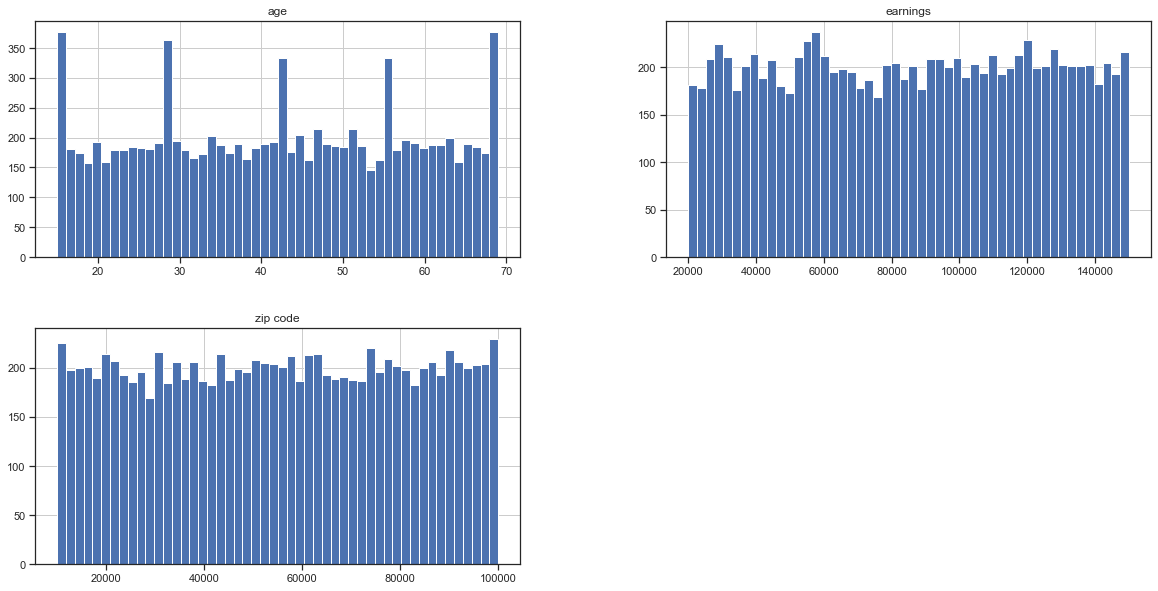

In [12]:
data.hist(bins=50, figsize=(20,10)) 
plt.show()

We can visualize the data to find correlations if any between the features. 

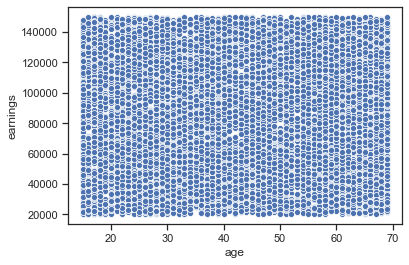

In [13]:
sns.scatterplot(x="age", y="earnings",data=data)


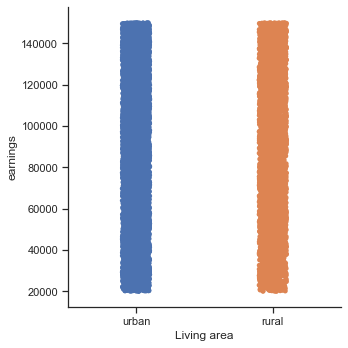

In [14]:
sns.catplot(x="Living area", y="earnings", data=data)


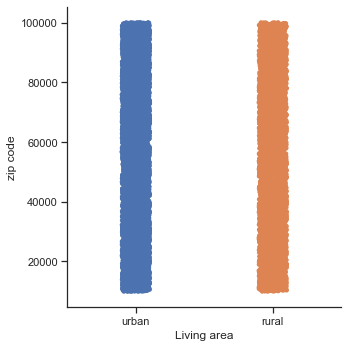

In [15]:
sns.catplot(x="Living area", y="zip code", data=data)


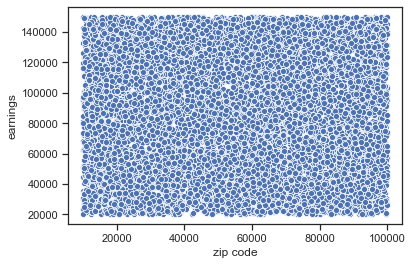

In [16]:
sns.scatterplot(x="zip code", y="earnings",data=data)


In [17]:
corr_matrix = data.corr()

In [18]:
corr_matrix["earnings"].sort_values(ascending=False)

earnings    1.000000
age         0.002031
zip code   -0.004595
Name: earnings, dtype: float64

It seems like the data is mostly uniformly distributed across all values for the numerical attributes.

From the visualizations above, we couldnt see any correlation patterns between age and earnings. The data seem to be distributed equally across different combinations of age and earnings. It is highly probable that the data is generated artificially. Hence, the model built with this data might not be useful for making predcitions with real world data. 

Also, we  have to note that zip code cannot be treated like a numerical attribute although they have numerical values. Hence, we convert the zip codes to strings to not let the feature mistrain the model. Now zip code column being a categorical attribute can cause feature explosion if one-hot encoded. Hence, we try to slice the zip code column, retaining the first 2 digits with an assumption that zip codes having same first 2 digits are closer/near-by. 

In [19]:
data["zip code"] = data["zip code"].astype(str)

In [20]:
print("Unique zip codes in data:",data["zip code"].str[:2].nunique())
np.sort(data["zip code"].str[:2].unique())
data["zip_code_sliced"] = data["zip code"].str[:2]
print("Unique sliced zip codes in training data:",data["zip_code_sliced"].nunique())

Unique zip codes in data: 90
Unique sliced zip codes in training data: 90


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10000 non-null  object 
 1   age              10000 non-null  float64
 2   lifestyle        10000 non-null  object 
 3   zip code         10000 non-null  object 
 4   family status    10000 non-null  object 
 5   car              10000 non-null  object 
 6   sports           8500 non-null   object 
 7   earnings         10000 non-null  float64
 8   label            10000 non-null  object 
 9   Living area      10000 non-null  object 
 10  zip_code_sliced  10000 non-null  object 
dtypes: float64(2), object(9)
memory usage: 859.5+ KB


In [22]:
data = data.drop(['zip code'],axis=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10000 non-null  object 
 1   age              10000 non-null  float64
 2   lifestyle        10000 non-null  object 
 3   family status    10000 non-null  object 
 4   car              10000 non-null  object 
 5   sports           8500 non-null   object 
 6   earnings         10000 non-null  float64
 7   label            10000 non-null  object 
 8   Living area      10000 non-null  object 
 9   zip_code_sliced  10000 non-null  object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [24]:
data.head()

,name,age,lifestyle,family status,car,sports,earnings,label,Living area,zip_code_sliced
0,VnSEFOuL,62.0,cozily,married,practical,athletics,102526.0,no response,urban,50
1,8Tv0hcce,34.0,active,married,expensive,soccer,33006.0,no response,urban,66
2,Zny9ysbk,69.0,healthy,single,expensive,badminton,118760.0,response,urban,16
3,HV3xCamM,57.0,cozily,married,practical,soccer,131429.0,response,urban,50
4,sflRsQ6v,66.0,cozily,single,practical,badminton,96003.0,response,urban,35


In [25]:
data.shape

(10000, 10)

In [26]:
np.sort(data["zip_code_sliced"].unique())

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
       '98', '99'], dtype=object)

In [27]:
zip_dummies = pd.get_dummies(data["zip_code_sliced"],prefix='zip')
zip_dummies.shape

(10000, 90)

In [28]:
data_new = pd.concat([data,zip_dummies],axis=1)
data_new.shape

(10000, 100)

In [29]:
data_new = data_new.drop(["zip_code_sliced"],axis=1)

In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           10000 non-null  object 
 1   age            10000 non-null  float64
 2   lifestyle      10000 non-null  object 
 3   family status  10000 non-null  object 
 4   car            10000 non-null  object 
 5   sports         8500 non-null   object 
 6   earnings       10000 non-null  float64
 7   label          10000 non-null  object 
 8   Living area    10000 non-null  object 
 9   zip_10         10000 non-null  uint8  
 10  zip_11         10000 non-null  uint8  
 11  zip_12         10000 non-null  uint8  
 12  zip_13         10000 non-null  uint8  
 13  zip_14         10000 non-null  uint8  
 14  zip_15         10000 non-null  uint8  
 15  zip_16         10000 non-null  uint8  
 16  zip_17         10000 non-null  uint8  
 17  zip_18         10000 non-null  uint8  
 18  zip_19 

### Creating test set

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_new, test_size=0.20, random_state=32)

In [32]:
train_set.shape

(8000, 99)

In [33]:
test_set.shape

(2000, 99)

### Checking for null values

In [34]:
train_set.isnull().any()


name             False
age              False
lifestyle        False
family status    False
car              False
                 ...  
zip_95           False
zip_96           False
zip_97           False
zip_98           False
zip_99           False
Length: 99, dtype: bool

In [35]:
train_set["sports"].isnull().sum()

1207

In [36]:
train_set["sports"].isnull().unique()

array([False,  True])

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(train_set)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [38]:
X = imputer.transform(train_set)

In [39]:
train_set=pd.DataFrame(X,columns=train_set.columns)

In [40]:
train_set["sports"].isnull().unique()

array([False])

In [41]:
train_set.isnull().any()


name             False
age              False
lifestyle        False
family status    False
car              False
                 ...  
zip_95           False
zip_96           False
zip_97           False
zip_98           False
zip_99           False
Length: 99, dtype: bool

### Transforming numerical and categorical attributes

In [42]:
train_set["zip_16"].head()

0    1
1    0
2    0
3    0
4    0
Name: zip_16, dtype: object

The numerical features are standardized and the categorical attributes are encoded

In [43]:
num_attributes = ["age","earnings"]
cat1_attributes = ["lifestyle","sports","family status","car","Living area"]
#cat2_attributes = ["family status","car","Living area"]
other_sstr = train_set.columns[9:99].tolist()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
full_pipe = ColumnTransformer([
    ("num",StandardScaler(),num_attributes),
    ("cat1",OneHotEncoder(),cat1_attributes),
#    ("cat2",OrdinalEncoder(),cat2_attributes),
    ("other",'passthrough',other_sstr)
])

In [44]:
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    X_train = full_pipe.fit_transform(train_set)

X_train[0,:]

array([1.0715150249853442, 1.6939512032235484, 1.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [45]:
labels = ["label"]
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
y_train = labelencode.fit_transform(train_set["label"])

In [46]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
np.unique(y_train)

array([0, 1])

In [48]:
X_train.shape

(8000, 104)

In [49]:
y_train.shape

(8000,)

In [50]:
np.count_nonzero(y_train==0)

5303

In [51]:
full_pipe.transformers_

[('num',
  StandardScaler(copy=True, with_mean=True, with_std=True),
  ['age', 'earnings']),
 ('cat1', OneHotEncoder(categorical_features=None, categories=None,
         dtype=<class 'numpy.float64'>, handle_unknown='error',
         n_values=None, sparse=True), ['lifestyle',
   'sports',
   'family status',
   'car',
   'Living area']),
 ('other',
  'passthrough',
  ['zip_10',
   'zip_11',
   'zip_12',
   'zip_13',
   'zip_14',
   'zip_15',
   'zip_16',
   'zip_17',
   'zip_18',
   'zip_19',
   'zip_20',
   'zip_21',
   'zip_22',
   'zip_23',
   'zip_24',
   'zip_25',
   'zip_26',
   'zip_27',
   'zip_28',
   'zip_29',
   'zip_30',
   'zip_31',
   'zip_32',
   'zip_33',
   'zip_34',
   'zip_35',
   'zip_36',
   'zip_37',
   'zip_38',
   'zip_39',
   'zip_40',
   'zip_41',
   'zip_42',
   'zip_43',
   'zip_44',
   'zip_45',
   'zip_46',
   'zip_47',
   'zip_48',
   'zip_49',
   'zip_50',
   'zip_51',
   'zip_52',
   'zip_53',
   'zip_54',
   'zip_55',
   'zip_56',
   'zip_57',
   'zip_

In [52]:
numerical_features = full_pipe.transformers_[0][2]

In [53]:
one_hot_features = full_pipe.transformers_[1][1].get_feature_names().tolist()

In [54]:
other_features = full_pipe.transformers_[2][2]

In [55]:
all_encoded_features = numerical_features+one_hot_features+other_features
len(all_encoded_features)

104

### Preparing test data

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
y_test = labelencode.fit_transform(test_set["label"])

In [57]:
test_set = test_set.drop(['name','label'],axis=1)

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(test_set)
X_test = imputer.transform(test_set)
test_set=pd.DataFrame(X_test,columns=test_set.columns)
test_set.isnull().any()

age              False
lifestyle        False
family status    False
car              False
sports           False
                 ...  
zip_95           False
zip_96           False
zip_97           False
zip_98           False
zip_99           False
Length: 97, dtype: bool

In [59]:
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    
    X_test = full_pipe.fit_transform(test_set)

X_test[0,:]

array([-0.9350511182396769, 1.7170406150647433, 1.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [60]:
X_test.shape

(2000, 104)

In [61]:
y_test.shape

(2000,)

In [62]:
np.unique(y_test)

array([0, 1])

#### Confusion matrix function

In [63]:
def confuse_mat(y,y_p):
    from sklearn.metrics import confusion_matrix
    cf = confusion_matrix(y, y_p)
    print("Confusion matrix:\n",cf)
    print("No: of instances with correct classification:\n",
          cf[0,0],"+",cf[1,1],"=",cf[0,0]+cf[1,1],"(out of",y.shape[0],"instances)")

## Model Fitting

### Linear models with Stochastic gradient descent training

In [64]:
# SGDClassifier

warnings.filterwarnings('ignore')

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge',random_state=10)
sgd_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(sgd_clf, X_train, y_train, cv=7, scoring="accuracy") # gives accuracies for each fold
accuracies.mean()

0.7773649752116869

In [65]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=7)
print(np.unique(y_train_pred))

confuse_mat(y_train, y_train_pred)

[0 1]
Confusion matrix:
 [[4273 1030]
 [ 751 1946]]
No: of instances with correct classification:
 4273 + 1946 = 6219 (out of 8000 instances)


#### Hyperparameter tuning for SGD classifier

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'loss':['hinge', 'log','modified_huber','squared_hinge', 'perceptron'],
              'class_weight':['balanced',None,{0:2,1:1},{0:3,1:1},{0:1,1:2}],
              'penalty':['l2', 'l1', 'elasticnet'],
              'alpha':[0.0001,0.1,0.4,0.45,0.5,1,2],
              'learning_rate':['optimal']} 

grid_search = GridSearchCV(sgd_clf, param_grid , cv=7)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=10, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'class_weight': ['balanced', None, {0: 2, 1: 1}, {0: 3, 1: 1}, {0: 1, 1: 2}], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.1, 0.4, 0.45, 0.5, 1, 2], 'learning_rate': ['optimal']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
grid_search.best_params_

{'alpha': 0.1,
 'class_weight': None,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'penalty': 'l1'}

In [68]:
model = grid_search.best_estimator_
model

SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=10, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X_train, y_train, cv=6) # gives accuracies for each fold
print("Training accuracy:",accuracies.mean())

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=6)
print(np.unique(y_train_pred))

confuse_mat(y_train, y_train_pred)

Training accuracy: 0.792357805623725
[0 1]
Confusion matrix:
 [[4927  376]
 [1285 1412]]
No: of instances with correct classification:
 4927 + 1412 = 6339 (out of 8000 instances)


In [70]:
y_test_pred = model.predict(X_test)
print(np.unique(y_test_pred))
confuse_mat(y_test, y_test_pred)

[0 1]
Confusion matrix:
 [[1197  140]
 [ 201  462]]
No: of instances with correct classification:
 1197 + 462 = 1659 (out of 2000 instances)


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8295

### Random forests

In [72]:
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10,max_depth=10,max_features=104, criterion='entropy', random_state=9)
forest_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(forest_clf, X_train, y_train, cv=6) # gives accuracies for each fold
accuracies.mean()

0.917373442763692

In [73]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=6)
print(np.unique(y_train_pred))

confuse_mat(y_train, y_train_pred)

[0 1]
Confusion matrix:
 [[4925  378]
 [ 283 2414]]
No: of instances with correct classification:
 4925 + 2414 = 7339 (out of 8000 instances)


In [74]:
forest_clf.feature_importances_

array([4.84268757e-01, 2.62181708e-01, 1.96879704e-03, 3.14186906e-03,
       2.21635691e-03, 3.48617504e-03, 2.22383934e-03, 4.05545292e-03,
       2.11062345e-03, 2.70726447e-03, 1.41249509e-03, 1.86013012e-03,
       2.21314724e-03, 2.20419451e-03, 3.85923788e-02, 3.87042190e-02,
       3.97587300e-02, 3.03009350e-02, 3.58305699e-02, 2.17700788e-04,
       8.67940189e-04, 7.10110913e-04, 1.19809204e-03, 1.01908669e-04,
       0.00000000e+00, 7.18554702e-04, 0.00000000e+00, 3.80271825e-04,
       0.00000000e+00, 4.70875967e-04, 9.94720367e-04, 2.08362839e-04,
       0.00000000e+00, 7.67159850e-05, 2.55947130e-04, 2.36967892e-04,
       2.02643891e-04, 9.18913312e-05, 1.56456276e-03, 0.00000000e+00,
       3.62169824e-04, 3.48568221e-04, 6.67112672e-04, 5.03084659e-04,
       2.98067927e-04, 1.40131656e-03, 2.10963037e-04, 9.42742648e-05,
       1.76201272e-04, 3.76808252e-04, 9.22098423e-04, 4.73857785e-04,
       2.31046714e-04, 1.39639389e-04, 4.71172836e-04, 8.21701813e-04,
      

In [75]:
pd.set_option('display.max_rows', 10)

In [76]:
# train_set.columns.tolist()

important_features = pd.DataFrame(forest_clf.feature_importances_,index=all_encoded_features)
important_features.sort_values(0,axis=0,ascending=False)

,0
age,0.484269
earnings,0.262182
zip_12,0.039759
zip_11,0.038704
zip_10,0.038592
...,...
zip_82,0.000000
zip_53,0.000000
zip_58,0.000000
zip_76,0.000000


In [77]:
important_features

,0
age,0.484269
earnings,0.262182
x0_active,0.001969
x0_cozily,0.003142
x0_healthy,0.002216
...,...
zip_95,0.000332
zip_96,0.000423
zip_97,0.000107
zip_98,0.000000


#### Hyperparameter tuning for Random forest classification: 

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3,10,50,70,90,100,200],'max_features': [10,50,104],'min_samples_leaf':[1,2,3],'max_depth': [10,50,70,90]},
              {'bootstrap': [False], 'n_estimators': [3,10,50,70,90], 'min_samples_leaf':[1,2],'max_features': [10,50,104]}]
 
grid_search = GridSearchCV(forest_clf, param_grid , cv=6)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=104, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 50, 70, 90, 100, 200], 'max_features': [10, 50, 104], 'min_samples_leaf': [1, 2, 3], 'max_depth': [10, 50, 70, 90]}, {'bootstrap': [False], 'n_estimators': [3, 10, 50, 70, 90], 'min_samples_leaf': [1, 2], 'max_features': [10, 50, 104]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
grid_search.best_params_

{'max_depth': 50,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [80]:
model = grid_search.best_estimator_

In [81]:
model.feature_importances_

array([0.48984965, 0.22220514, 0.00722794, 0.0075765 , 0.00735358,
       0.00679052, 0.00617914, 0.00624244, 0.00606179, 0.00625283,
       0.00696887, 0.00708487, 0.00643372, 0.00634429, 0.02397727,
       0.02519708, 0.0254692 , 0.01608109, 0.02178055, 0.000889  ,
       0.00110007, 0.00134134, 0.00094094, 0.00115359, 0.00112186,
       0.0011772 , 0.00106004, 0.00103409, 0.0009268 , 0.00104593,
       0.0010609 , 0.00111918, 0.0011114 , 0.0006258 , 0.00116836,
       0.00094548, 0.0011735 , 0.00095831, 0.0019124 , 0.00074143,
       0.00099345, 0.00124349, 0.00182069, 0.00085079, 0.00129133,
       0.0011888 , 0.00148792, 0.0012757 , 0.00079725, 0.00119444,
       0.0010402 , 0.00112816, 0.00119306, 0.0008639 , 0.00085215,
       0.00106801, 0.00092649, 0.00079312, 0.00137289, 0.00101305,
       0.000791  , 0.00087707, 0.00113023, 0.0009186 , 0.00154621,
       0.00116132, 0.001087  , 0.00102393, 0.00092101, 0.00122721,
       0.00134492, 0.00109577, 0.00077089, 0.00179831, 0.00104

In [82]:
# train_set.columns.tolist()

important_features = pd.DataFrame(model.feature_importances_,index=all_encoded_features)
important_features.sort_values(0,axis=0,ascending=False)

,0
age,0.489850
earnings,0.222205
zip_12,0.025469
zip_11,0.025197
zip_10,0.023977
...,...
zip_56,0.000791
zip_68,0.000771
zip_72,0.000747
zip_35,0.000741


In [83]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X_train, y_train, cv=6) # gives accuracies for each fold
print("Accuracy:",accuracies.mean())

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=6)

confuse_mat(y_train, y_train_pred)

Accuracy: 0.9203738190300329
Confusion matrix:
 [[4920  383]
 [ 254 2443]]
No: of instances with correct classification:
 4920 + 2443 = 7363 (out of 8000 instances)


In [84]:
y_test_pred = model.predict(X_test)
print(np.unique(y_test_pred))
confuse_mat(y_test, y_test_pred)

[0 1]
Confusion matrix:
 [[1247   90]
 [  85  578]]
No: of instances with correct classification:
 1247 + 578 = 1825 (out of 2000 instances)


In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9125

### Logistic Regression

In [86]:
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(logistic_clf, X_train, y_train, cv=6) # gives accuracies for each fold
accuracies.mean()

0.8168753821377622

In [87]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logistic_clf, X_train, y_train, cv=6)
print(np.unique(y_train_pred))

confuse_mat(y_train, y_train_pred)

[0 1]
Confusion matrix:
 [[4720  583]
 [ 882 1815]]
No: of instances with correct classification:
 4720 + 1815 = 6535 (out of 8000 instances)


#### Hyperparameter tuning for Logistic Regression

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C':[0.1,0.25,0.5,1,1.5,2],
              'class_weight':['balanced',None,{0:2,1:1},{0:3,1:1},{0:1,1:2}],
              'penalty':['l2'],
              'dual':[True],
              'solver':['liblinear']},
              {'C':[0.1,0.25,0.5,1,1.5,2],
              'class_weight':['balanced',None,{0:2,1:1},{0:3,1:1},{0:1,1:2}],
              'penalty':['l2', 'l1']},
              {'C':[0.1,0.25,0.5,1,1.5,2],
              'class_weight':['balanced',None,{0:2,1:1},{0:3,1:1},{0:1,1:2}],
              'penalty':['l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
              

grid_search = GridSearchCV(logistic_clf, param_grid , cv=6)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 0.25, 0.5, 1, 1.5, 2], 'class_weight': ['balanced', None, {0: 2, 1: 1}, {0: 3, 1: 1}, {0: 1, 1: 2}], 'penalty': ['l2'], 'dual': [True], 'solver': ['liblinear']}, {'C': [0.1, 0.25, 0.5, 1, 1.5, 2], 'class_weight': ['balanced', None, {0: 2, 1: 1}, {0: 3, 1: 1}, {0: 1, 1: 2}], '...1}, {0: 1, 1: 2}], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
grid_search.best_params_

{'C': 0.25, 'class_weight': None, 'penalty': 'l1'}

In [90]:
model = grid_search.best_estimator_
model

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X_train, y_train, cv=6) # gives accuracies for each fold
print("Training accuracy:",accuracies.mean())

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=6)

confuse_mat(y_train, y_train_pred)

Training accuracy: 0.8205002576220006
Confusion matrix:
 [[4733  570]
 [ 866 1831]]
No: of instances with correct classification:
 4733 + 1831 = 6564 (out of 8000 instances)


In [92]:
y_test_pred = model.predict(X_test)
print(np.unique(y_test_pred))
confuse_mat(y_test, y_test_pred)

[0 1]
Confusion matrix:
 [[1211  126]
 [ 217  446]]
No: of instances with correct classification:
 1211 + 446 = 1657 (out of 2000 instances)


In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8285